# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `here`

Student ID: `here`

## Part 1: Linear Regression from Scratch (10 points)

In this section, we will implement **Linear Regression** using two different approaches:

1. **Gradient Descent (GD):** An iterative optimization algorithm to minimize the cost function.
2. **Normal Equation:** A direct solution using matrix operations.

We will then generate a synthetic dataset and test our implementation.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def compute_cost(self, X, y):
        m = len(y)
        predictions = X @ self.theta # 📣
        return (1 / (2 * m)) * np.sum((predictions - y) ** 2) # 📣

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        cost_history = []

        for _ in range(self.epochs):
            gradients = (1 / m) * X.T @ (X @ self.theta - y) # 📣
            self.theta -= self.learning_rate * gradients # 📣
            cost_history.append(self.compute_cost(X, y))

        return cost_history

    def predict(self, X):
        return X @ self.theta

In [ ]:
class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y # 📣

    def predict(self, X):
        return X @ self.theta


## Part 2: Evaluating Linear Regression on a Synthetic Dataset (5 points)

Now, we will generate a synthetic dataset using a simple linear function:

$$
y = 3x + 5 + \text{normal noise}
$$


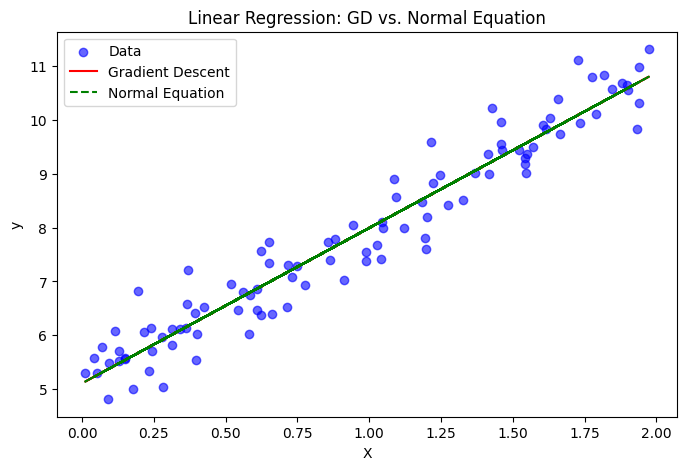

In [8]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 5 + np.random.randn(100, 1) * 0.5

X_b = np.c_[np.ones((100, 1)), X]

lr_gd = LinearRegressionGD(learning_rate=0.1, epochs=1000)
cost_history = lr_gd.fit(X_b, y)
y_pred_gd = lr_gd.predict(X_b)

lr_ne = LinearRegressionNormalEq()
lr_ne.fit(X_b, y)
y_pred_ne = lr_ne.predict(X_b)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X, y_pred_gd, label="Gradient Descent", color="red")
plt.plot(X, y_pred_ne, label="Normal Equation", color="green", linestyle="dashed")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: GD vs. Normal Equation")
plt.show()


## Part 3: Non-Linear (Polynomial) Regression from Scratch (15 points)

Polynomial regression extends linear regression by introducing polynomial features:

$$
y = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_n x^n + \epsilon
$$

### Steps:
1. **Feature Expansion:** Convert input \( X \) to polynomial features.
2. **Train the Model:** Fit the model using both Gradient Descent and the Normal Equation.
3. **Evaluate Model Performance:** Compute **Root Mean Squared Error (RMSE)**.
4. **Visualize Results:** Compare different polynomial degrees and their impact on overfitting.


You may need to use `StandardScaler` to fix the problem of overflow !

In [ ]:
from sklearn.preprocessing import StandardScaler

class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def transform(self, X):
        X_poly = np.ones((X.shape[0], 1))
        for d in range(1, self.degree + 1):
            X_poly = np.c_[X_poly, X ** d] # 📣
        return X_poly

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        cost_history = []

        for _ in range(self.epochs):
            gradients = (1 / m) * X.T @ (X @ self.theta - y)
            self.theta -= self.learning_rate * gradients
            cost = (1 / (2 * m)) * np.sum((X @ self.theta - y) ** 2)
            cost_history.append(cost)

        return cost_history

    def predict(self, X):
        return X @ self.theta

class LinearRegressionNormalEq:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        self.theta = np.linalg.pinv(X.T @ X) @ X.T @ y

    def predict(self, X):
        return X @ self.theta # 📣

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


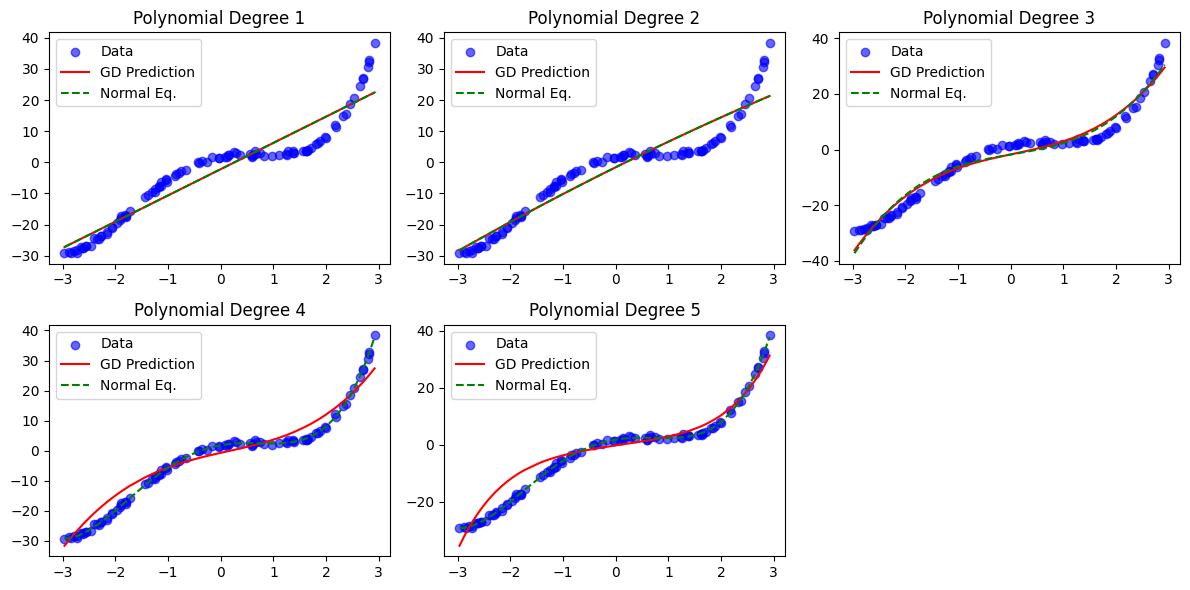

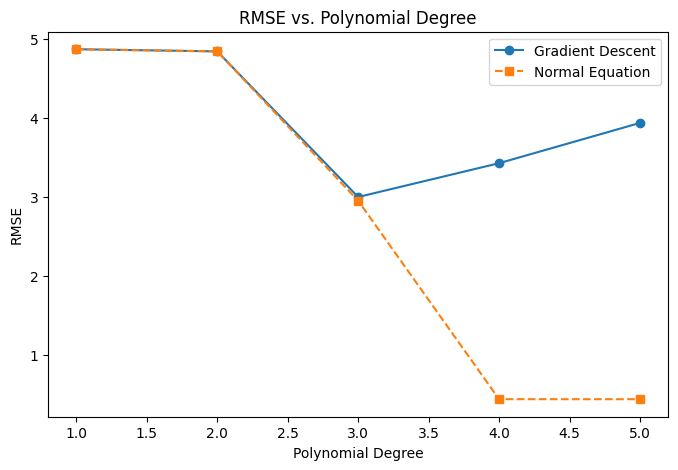

In [ ]:
np.random.seed(42)
N_samples = 100
X_poly = 6 * np.random.rand(N_samples, 1) - 3

# 📣
y_poly = 2 + 3 * X_poly - 4 * X_poly**2 + X_poly**3 + 0.5 * X_poly**4 + np.random.randn(N_samples, 1) * 0.5  # Polynomial relation with noise

degrees = [1, 2, 3, 4, 5]
rmse_values_gd, rmse_values_ne = [], []

plt.figure(figsize=(12, 6))
for degree in degrees:
    poly_transformer = PolynomialFeatures(degree)
    X_poly_transformed = poly_transformer.transform(X_poly)

    scaler = StandardScaler() # 📣
    X_poly_transformed[:, 1:] = scaler.fit_transform(X_poly_transformed[:, 1:])  # 📣 # Exclude bias term

    learning_rate = 0.1 / (degree ** 2)
    epochs = 500 if degree < 4 else 200  # Reduce epochs for higher degrees

    lr_gd_poly = LinearRegressionGD(learning_rate=learning_rate, epochs=epochs)
    lr_gd_poly.fit(X_poly_transformed, y_poly)
    y_pred_gd_poly = lr_gd_poly.predict(X_poly_transformed)

    lr_ne_poly = LinearRegressionNormalEq()
    lr_ne_poly.fit(X_poly_transformed, y_poly)
    y_pred_ne_poly = lr_ne_poly.predict(X_poly_transformed)

    rmse_gd = rmse(y_poly, y_pred_gd_poly)
    rmse_ne = rmse(y_poly, y_pred_ne_poly)
    rmse_values_gd.append(rmse_gd)
    rmse_values_ne.append(rmse_ne)

    sorted_indices = np.argsort(X_poly[:, 0])
    X_poly_sorted, y_poly_sorted_gd = X_poly[sorted_indices], y_pred_gd_poly[sorted_indices]
    y_poly_sorted_ne = y_pred_ne_poly[sorted_indices]

    plt.subplot(2, 3, degree)
    plt.scatter(X_poly, y_poly, label="Data", color="blue", alpha=0.6)
    plt.plot(X_poly_sorted, y_poly_sorted_gd, label="GD Prediction", color="red")
    plt.plot(X_poly_sorted, y_poly_sorted_ne, label="Normal Eq.", color="green", linestyle="dashed")
    plt.title(f"Polynomial Degree {degree}")
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(degrees, rmse_values_gd, marker='o', label="Gradient Descent")
plt.plot(degrees, rmse_values_ne, marker='s', label="Normal Equation", linestyle="dashed")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs. Polynomial Degree")
plt.legend()
plt.show()


## Part 4.1: Train-Test Split and Validation (5 points)

When training a machine learning model, we need to assess its performance on unseen data. Using the same dataset for both training and evaluation can lead to **overfitting**—the model memorizes the data instead of learning patterns.

- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate how well the model generalizes.
- **Validation Set** (optional): Used to tune hyperparameters before final testing.

Typically, we split the data as follows:
- **80% Training, 20% Testing** (Common for small datasets)
- **70% Training, 15% Validation, 15% Testing** (For tuning hyperparameters)

## Part 4.2: Cross-Validation (5 points)

If we randomly split data into train-test once, the model’s performance may **depend on the specific split**. This could lead to:
1. **High variance in evaluation** (If data distribution isn't uniform)
2. **Biased results** (If important samples are missing in training)

Instead of a single train-test split, **k-Fold Cross-Validation** divides data into `k` equal parts:
- The model trains on `(k-1)` parts and tests on the remaining part.
- This repeats `k` times, each time using a different split.
- The final score is the **average of all k evaluations**.

We will implement **k-Fold Cross-Validation** from scratch and compare it with `cross_val_score` from sklearn.


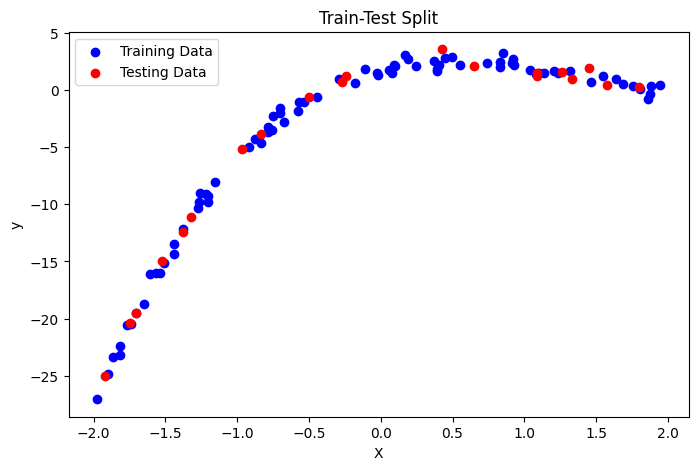

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 4 * np.random.rand(100, 1) - 2
y = 2 + 3 * X - 4 * X**2 + X**3 + np.random.randn(100, 1) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 📣

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train-Test Split")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def k_fold_cv(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42) # 📣
    rmse_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # 📣
        rmse_scores.append(rmse)

    return np.mean(rmse_scores) # 📣

avg_rmse = k_fold_cv(X, y, k=5)
print(f"Average RMSE across 5-Fold CV: {avg_rmse:.4f}")


Average RMSE across 5-Fold CV: 4.9549


## Part 5: Overfitting in Polynomial Regression (10 points)

A model is **overfitting** when it performs **very well on training data** but **poorly on test data**.  
This happens when the model is **too complex**, learning **noise** instead of patterns.

- We will fit polynomial regression with varying degrees (1 to 10).
- We'll compare **training RMSE vs. test RMSE**.
- A significant gap between training and test RMSE indicates **overfitting**.


<Figure size 1200x800 with 0 Axes>

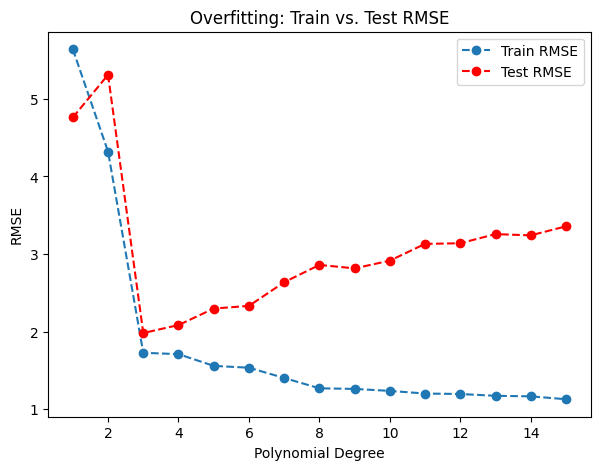

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 6 * np.random.rand(40, 1) - 2
y = 2 - 2 * X - 2 * X**2 + X**3 + np.random.randn(40, 1) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = [i for i in range(1, 16)]
train_rmse, test_rmse = [], []

plt.figure(figsize=(12, 8))
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

plt.figure(figsize=(7, 5))
plt.plot(degrees, train_rmse, label="Train RMSE", marker="o", linestyle="dashed")
plt.plot(degrees, test_rmse, label="Test RMSE", marker="o", linestyle="dashed", color="red")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Overfitting: Train vs. Test RMSE")
plt.legend()
plt.show()


## Part 7: Ridge & Lasso Regression: Solving Overfitting (10 points)

Regularization **adds a penalty** to the model to **reduce overfitting**.

### Ridge Regression (L2 Regularization)
- Adds **L2 penalty**: `λ * ||θ||²`
- Keeps all features but shrinks coefficients.

### Lasso Regression (L1 Regularization)
- Adds **L1 penalty**: `λ * ||θ||`
- Can set some coefficients **exactly to zero**, performing feature selection.

1. Apply **Ridge & Lasso Regression** on our dataset.
2. Compare them to standard **Polynomial Regression**.
3. Evaluate **RMSE on test data**.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.846e+01, tolerance: 2.294e-01
  model = cd_fast.enet_coordinate_descent(


RMSE - Polynomial Regression (Degree 10): 0.9969
RMSE - Ridge Regression (L2, α=10): 0.9651
RMSE - Lasso Regression (L1, α=0.1): 0.8476


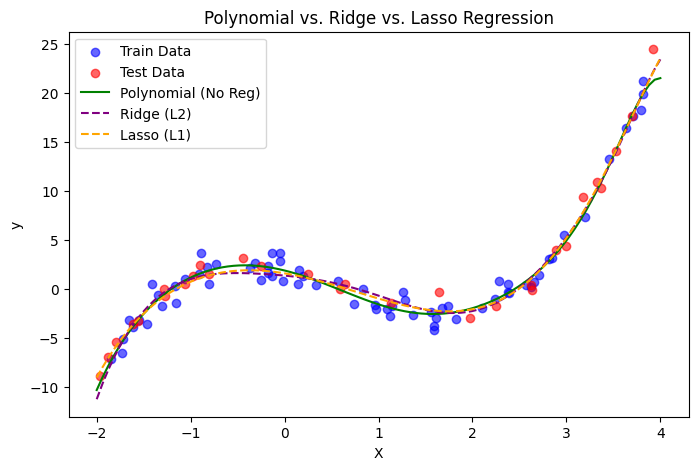

In [ ]:
from sklearn.linear_model import Ridge, Lasso

degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Ridge Regression
model_ridge = Ridge(alpha=10) # 📣
model_ridge.fit(X_train_poly, y_train) # 📣
y_pred_ridge = model_ridge.predict(X_test_poly)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression
model_lasso = Lasso(alpha=0.1) # 📣
model_lasso.fit(X_train_poly, y_train) # 📣
y_pred_lasso = model_lasso.predict(X_test_poly)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"RMSE - Polynomial Regression (Degree {degree}): {rmse_poly:.4f}")
print(f"RMSE - Ridge Regression (L2, α=10): {rmse_ridge:.4f}")
print(f"RMSE - Lasso Regression (L1, α=0.1): {rmse_lasso:.4f}")

plt.figure(figsize=(8, 5))
X_plot = np.linspace(-2, 4, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.6)
plt.plot(X_plot, model_poly.predict(X_plot_poly), color="green", label="Polynomial (No Reg)")
plt.plot(X_plot, model_ridge.predict(X_plot_poly), color="purple", linestyle="dashed", label="Ridge (L2)")
plt.plot(X_plot, model_lasso.predict(X_plot_poly), color="orange", linestyle="dashed", label="Lasso (L1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial vs. Ridge vs. Lasso Regression")
plt.legend()
plt.show()


## Part 8: Train-Test Split vs. Cross-Validation (10 points)

- A simple way to evaluate models: **train on one set, test on another**.
- **Problem:** Performance depends on how the data was split.
- Can lead to **high variance** in evaluation.

- **More reliable evaluation** by training & testing on multiple splits.
- **k-Fold CV:** Data is split into `k` parts.
  - Model is trained `k` times, each time using a different fold as test data.
  - We take the **average score** over `k` runs.

### Why Use CV?
**Your Answer:**

Best Ridge α: 0.0215, RMSE: 1.0002
Best Lasso α: 0.0046, RMSE: 0.9676


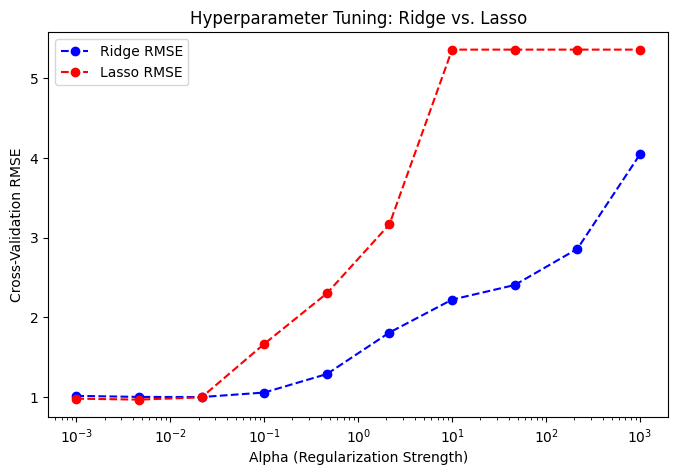

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

alphas = np.logspace(-3, 3, 10)  # From 0.001 to 1000

# Ridge Cross-Validation
ridge_scores = []
for alpha in alphas: # 📣
    model_ridge = make_pipeline(PolynomialFeatures(degree=10), StandardScaler(), Ridge(alpha=alpha)) # 📣
    score = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error") # 📣
    ridge_scores.append(np.mean(score))

# Lasso Cross-Validation
lasso_scores = []
for alpha in alphas:
    model_lasso = make_pipeline(PolynomialFeatures(degree=10), StandardScaler(), Lasso(alpha=alpha, max_iter=5000))
    score = cross_val_score(model_lasso, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    lasso_scores.append(np.mean(score))

ridge_rmse = [-s for s in ridge_scores]
lasso_rmse = [-s for s in lasso_scores]

best_ridge_alpha = alphas[np.argmin(ridge_rmse)] # 📣
best_lasso_alpha = alphas[np.argmin(lasso_rmse)]

print(f"Best Ridge α: {best_ridge_alpha:.4f}, RMSE: {min(ridge_rmse):.4f}")
print(f"Best Lasso α: {best_lasso_alpha:.4f}, RMSE: {min(lasso_rmse):.4f}")

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_rmse, label="Ridge RMSE", marker="o", linestyle="dashed", color="blue")
plt.plot(alphas, lasso_rmse, label="Lasso RMSE", marker="o", linestyle="dashed", color="red")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Cross-Validation RMSE")
plt.title("Hyperparameter Tuning: Ridge vs. Lasso")
plt.legend()
plt.show()
